In [21]:
import pandas as pd
import matplotlib as mlp
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all' #默认为'last'
import random
import matplotlib.pyplot as plt
import numpy as np
import time

<AxesSubplot:xlabel='LONGITUDE', ylabel='LATITUDE'>

<AxesSubplot:xlabel='LONGITUDE', ylabel='LATITUDE'>

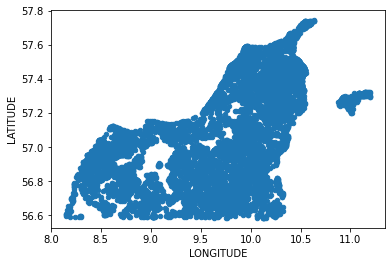

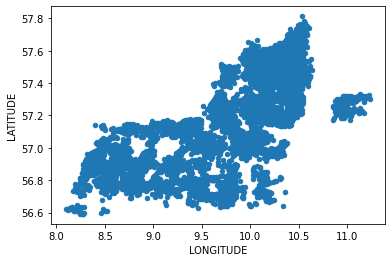

In [32]:
origin=pd.read_csv("../datasets/3D_spatial_network.csv")
origin=origin.sample(10000)
origin.plot.scatter(x='LONGITUDE', y='LATITUDE')
samples=pd.read_csv("../output/torch_vae_spatial_ld128_id128_bs500_ep100_rate1_binary_gaussian.csv")
samples=samples.sample(10000)
samples.plot.scatter(x='LONGITUDE', y='LATITUDE')

In [27]:

group_col="GROUP_ID"
agg_col="LATITUDE"
start=time.perf_counter()
origin=pd.read_csv("../datasets/3D_spatial_network_group.csv")
origin_res=origin.groupby(by=group_col).agg({agg_col:['sum','mean']})
origin_res
end=time.perf_counter()
print('query time:{}'.format(end - start))

LATITUDE           
                   sum       mean
GROUP_ID                         
0         9.032367e+05  56.607968
1         2.941396e+06  56.698340
2         3.381226e+06  56.824470
3         3.962302e+06  56.966464
4         4.208040e+06  57.075970
5         2.532179e+06  57.225672
6         2.282887e+06  57.338795
7         2.910557e+06  57.466368
8         1.283473e+06  57.591014
9         4.189447e+05  57.721784

query time:0.29264789999979257


<AxesSubplot:>

(array([0, 1, 2]),
 [Text(0, 0, 'on-line'), Text(1, 0, 'model'), Text(2, 0, 'off-line')])

Text(0.5, 1.0, 'Space Overhead')

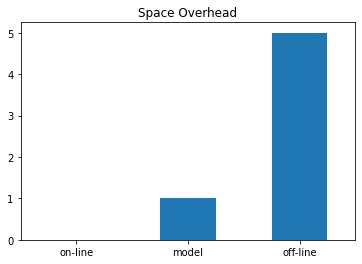

<AxesSubplot:>

(array([0, 1, 2]),
 [Text(0, 0, 'on-line'), Text(1, 0, 'model'), Text(2, 0, 'off-line')])

Text(0.5, 1.0, 'Query Latency')

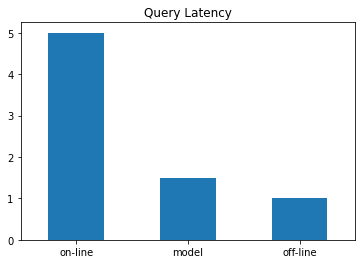

In [46]:
space = {"on-line":0,"model":1,"off-line":5}
s = pd.Series(space)
s.plot(kind='bar')
plt.xticks(rotation=0)
plt.title("Space Overhead")
plt.show()
time = {"on-line":5,"model":1.5,"off-line":1}
t = pd.Series(time)
t.plot(kind='bar')
plt.xticks(rotation=0)
plt.title("Query Latency")
plt.show()